url_for_this_tutorial = https://www.kaggle.com/benhamner/nips-papers#papers.csv

In [1]:
import pandas as pd
#read data
papers = pd.read_csv('data/papers.csv')

In [2]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
#remove columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name', 'year', 'title', 'abstract'], axis=1)

In [4]:
papers.head(10)

,paper_text
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,Bayesian Query Construction for Neural\nNetwor...
4,"Neural Network Ensembles, Cross\nValidation, a..."
5,U sing a neural net to instantiate a\ndeformab...
6,Plasticity-Mediated Competitive Learning\n\nTe...
7,ICEG Morphology Classification using an\nAnalo...
8,Real-Time Control of a Tokamak Plasma\nUsing N...
9,Real-Time Control of a Tokamak Plasma\nUsing N...


In [5]:
#remove newlines
def remove_newlines(txt):
    no_nl = txt.replace('\n',' ')
    return no_nl
papers['paper_text'] = papers['paper_text'].map(lambda x: remove_newlines(x))

In [6]:
#remove punctuation

0       767  SELF-ORGANIZATION OF ASSOCIATIVE DATABASE...
1       683  A MEAN FIELD THEORY OF LAYER IV OF VISUAL...
2       394  STORING COVARIANCE BY THE ASSOCIATIVE LON...
3       Bayesian Query Construction for Neural Network...
4       Neural Network Ensembles, Cross Validation, an...
                              ...                        
7236    Single Transistor Learning Synapses  Paul Hasl...
7237    Bias, Variance and the Combination of Least Sq...
7238    A Real Time Clustering CMOS Neural Engine T. S...
7239    Learning direction in global motion: two class...
7240    Correlation and Interpolation Networks for Rea...
Name: paper_text, Length: 7241, dtype: object

In [7]:
papers['paper_text'] = papers['paper_text'].map(lambda x: x.lower())

In [8]:
papers

,paper_text
0,767 self-organization of associative database...
1,683 a mean field theory of layer iv of visual...
2,394 storing covariance by the associative lon...
3,bayesian query construction for neural network...
4,"neural network ensembles, cross validation, an..."
...,...
7236,single transistor learning synapses paul hasl...
7237,"bias, variance and the combination of least sq..."
7238,a real time clustering cmos neural engine t. s...
7239,learning direction in global motion: two class...


In [9]:
from wordcloud import WordCloud

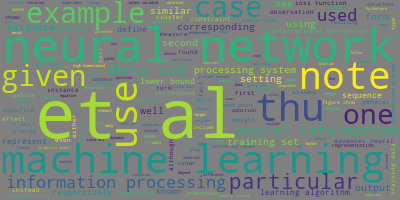

In [10]:
long_string = ','.join(list(papers['paper_text'].values))
wordcloud = WordCloud(background_color="grey", max_words=200, contour_width=3, contour_color='purple')
wordcloud.generate(long_string)
wordcloud.to_image()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

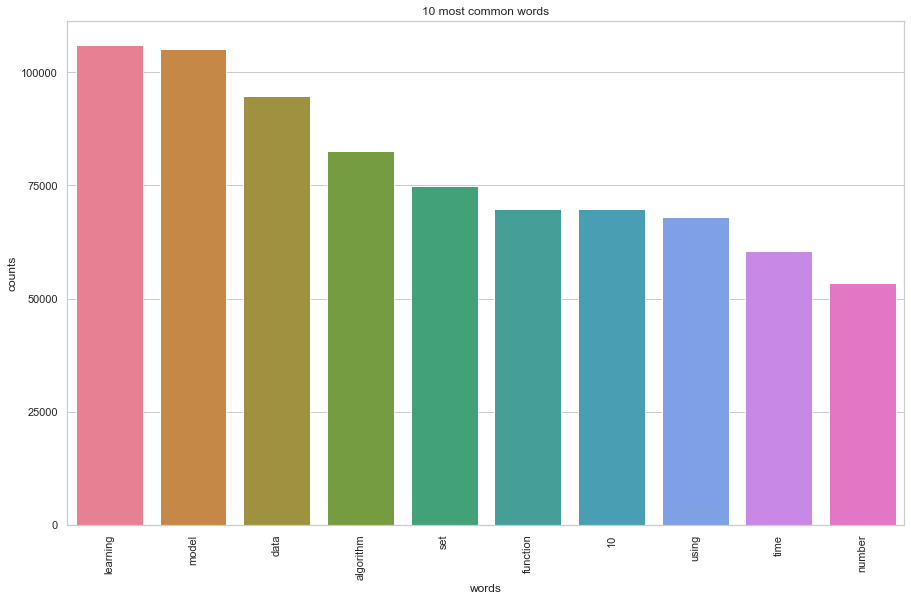

In [19]:
#helper
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 1.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# fit and transform titles
count_data = count_vectorizer.fit_transform(papers['paper_text'])
# visualize
plot_10_most_common_words(count_data, count_vectorizer)
    
    
    